In [160]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from io import StringIO

In [161]:
# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_df = pd.read_csv(school_data_to_load)
student_df = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_student_df = pd.merge(student_df, school_df, how="left", on=["school_name", "school_name"])

In [162]:
#Dist Summary DataFrame
school_stus_df=school_student_df.drop(["student_name","gender","grade","School ID"],axis=1)
school_stus_df.head()

,Student ID,school_name,reading_score,math_score,type,size,budget
0,0,Huang High School,66,79,District,2917,1910635
1,1,Huang High School,94,61,District,2917,1910635
2,2,Huang High School,90,60,District,2917,1910635
3,3,Huang High School,67,58,District,2917,1910635
4,4,Huang High School,97,84,District,2917,1910635


In [163]:
#Calculate the total number of schools
total_schools=school_df['school_name'].count()

#Calculate the total number of students
tot_students= student_df['student_name'].count()

#Calculate the total budget per school
total_budget= school_df["budget"].sum()

#Calculate the average math score 
average_math_score=student_df["math_score"].mean()

#Calculate the average reading score
average_reading_score=student_df["reading_score"].mean()

#Calculate the number of students with a passing math score
students_pass_math_score= school_student_df.loc[school_student_df["math_score"]>=70] 
#Calculate the percentage of students with a passing math score
perc_stu_pass_math= len(students_pass_math_score)/tot_students *100

#Calculate the number of students with a passing reading score
students_pass_reading_score=school_student_df.loc[school_student_df["reading_score"]>=70]
#Calculate the percentage of students with a passing reading score
perc_stu_pass_reading= len(students_pass_reading_score)/tot_students *100

# Calculate the percentage of students who passed math and reading (% Overall Passing)
overall_pass_math_reading= school_student_df.loc[(school_student_df["math_score"]>=70) &(school_student_df["reading_score"]>=70)].count()["student_name"]
overall_pass_grade=overall_pass_math_reading/tot_students*100


In [164]:
overall_pass_grade


65.17232575950983

In [165]:
# District Summary

# Create a dataframe to hold the above results
dist_summary=pd.DataFrame({
    "Total Schools":[total_schools],"Total Students":[tot_students],
    "Total Budget":[total_budget],"Average Math Score": [average_math_score],"Average Reading Score": [average_reading_score],
    "Passing Math %": [perc_stu_pass_math],"Passing Reading %": [perc_stu_pass_reading], "Overall Passing %":[overall_pass_grade]})
dist_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,Passing Math %,Passing Reading %,Overall Passing %
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,65.172326


In [166]:
# Improve formatting before outputting
dist_summary["Total Budget"] = dist_summary["Total Budget"].map("${0:,.2f}".format)
dist_summary["Total Students"] = dist_summary["Total Students"].map("{0:,.0f}".format)
dist_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,Passing Math %,Passing Reading %,Overall Passing %
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


In [200]:
# SCHOOL SUMMARY
school_index= school_df.set_index('school_name')

# Groupby function on schools
school_stus_index= school_stus_df.set_index('school_name')
school_group= school_stus_index.groupby(['school_name'])
school_group.head()



,Student ID,reading_score,math_score,type,size,budget
school_name,,,,,,
Huang High School,0,66,79,District,2917,1910635
Huang High School,1,94,61,District,2917,1910635
Huang High School,2,90,60,District,2917,1910635
Huang High School,3,67,58,District,2917,1910635
Huang High School,4,97,84,District,2917,1910635
...,...,...,...,...,...,...
Thomas High School,37535,76,76,Charter,1635,1043130
Thomas High School,37536,84,82,Charter,1635,1043130
Thomas High School,37537,80,90,Charter,1635,1043130


In [201]:

# School Type (District per school)
school_type=school_index["type"] 

# Total_Students per school
total_students= school_index["size"]

# Total Budget per School
school_budget=school_index["budget"] 

# Per student Budget
student_budget= school_budget/total_students

# Averages using Groupby on the reading score per school
average_reading_score = school_group["reading_score"].mean()

# Averages using Groupby on the math score per school
average_math_score = school_group["math_score"].mean()

# % Passing Math
passing_math= students_pass_math_score.groupby("school_name") 
perc_passing_math= passing_math["Student ID"].count()/total_students*100

# % Passing Reading
passing_reading= students_pass_reading_score.groupby("school_name") 
perc_passing_reading= passing_reading["Student ID"].count()/total_students*100

#% Overall Passing (The percentage of students that passed math and reading.)
# Calculate the percentage of students who passed math and reading (% Overall Passing)
overall_pass_m_r= school_student_df.loc[(school_student_df["math_score"]>=70) &(school_student_df["reading_score"]>=70)]
overall_passing=overall_pass_m_r.groupby("school_name").count()["student_name"] /total_students*100


In [221]:
student_budget


school_name
Huang High School        655.0
Figueroa High School     639.0
Shelton High School      600.0
Hernandez High School    652.0
Griffin High School      625.0
Wilson High School       578.0
Cabrera High School      582.0
Bailey High School       628.0
Holden High School       581.0
Pena High School         609.0
Wright High School       583.0
Rodriguez High School    637.0
Johnson High School      650.0
Ford High School         644.0
Thomas High School       638.0
dtype: float64

In [203]:
# 2. Create a dataframe to hold School Summary

schools_summary=pd.DataFrame({
    "School Type":school_type,
    "Total Students":total_students,
    "Total School Budget":school_budget,
    "Per Student Budget":student_budget,
    "Average Math Score":average_math_score,
    "Average Reading Score":average_reading_score,
    "% Passing Math":perc_passing_math,
    "% Passing Reading":perc_passing_reading,
    "Overall Passing Rate":overall_passing})


In [204]:
schools_summary.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
school_name,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455


In [205]:
# 3. Formatting the numbers
schools_summary["Total School Budget"]= schools_summary["Total School Budget"].map("${:,.2f}".format)
schools_summary["Per Student Budget"]= schools_summary["Per Student Budget"].map("${:,.2f}".format)

In [206]:
schools_summary.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455


In [207]:
# 4. Top Performing Schools (Sort and display the top five performing schools by % overall passing.)
top_schools= schools_summary.loc[schools_summary["Overall Passing Rate"]>90]
top_schools.sort_values(["Overall Passing Rate"], ascending=False).head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [208]:
#5. Bottom Performing Schools (By Passing Rate)
bottom_perf_schools= schools_summary.loc[schools_summary["Overall Passing Rate"]<75]
bottom_perf_schools.sort_values(["Overall Passing Rate"], ascending=True).head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


In [211]:
#6.  Math Scores by Grade
# First use loc to filter per grade, then groupby per school
# Second get column of reading score.mean()

# 9th grade
nineth= student_df.loc[student_df["grade"]=="9th"].groupby(["school_name"])
nineth_math_score=nineth["math_score"].mean()
# 10th grade
tenth= student_df.loc[student_df["grade"]=="10th"].groupby(["school_name"])
tenth_math_score=tenth["math_score"].mean()
# 11th grade
eleventh= student_df.loc[student_df["grade"]=="11th"].groupby(["school_name"])
eleventh_math_score=eleventh["math_score"].mean()
# 12th grade
twelveth= student_df.loc[student_df["grade"]=="12th"].groupby(["school_name"])
twelveth_math_score=twelveth["math_score"].mean()


In [212]:
#6. Create a table that lists the average Math Score
#for students of each grade level (9th, 10th, 11th, 12th) at each school.
math_score_grade= pd.DataFrame({"9th":nineth_math_score, "10th":tenth_math_score,
                   "11th":eleventh_math_score, "12th":twelveth_math_score
                    }, columns=["9th","10th","11th","12th"])
math_score_grade.head(15)

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


In [213]:
#7.  Reading Scores by Grade
# First use loc to filter per grade, then groupby per school
# Second get column of reading score.mean()

# 9th grade
nineth= student_df.loc[student_df["grade"]=="9th"].groupby(["school_name"])
nineth_read_score=nineth["reading_score"].mean()
# 10th grade
tenth= student_df.loc[student_df["grade"]=="10th"].groupby(["school_name"])
tenth_read_score=tenth["reading_score"].mean()
# 11th grade
eleventh= student_df.loc[student_df["grade"]=="11th"].groupby(["school_name"])
eleventh_read_score=eleventh["reading_score"].mean()
# 12th grade
twelveth= student_df.loc[student_df["grade"]=="12th"].groupby(["school_name"])
twelveth_read_score=twelveth["reading_score"].mean()

In [214]:
#7. Create a table that lists the average Reading Score
#for students of each grade level (9th, 10th, 11th, 12th) at each school.
read_score_grade= pd.DataFrame({"9th":nineth_read_score, "10th":tenth_read_score,
                   "11th":eleventh_read_score, "12th":twelveth_read_score
                    }, columns=["9th","10th","11th","12th"])
read_score_grade.head(15)

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


In [218]:
# 8. Scores by School Spending

# Create a table that breaks down school performances based on average Spending Ranges (Per Student).
#Use 4 reasonable bins to group school spending. Include in the table each of the following:

#Binning 
spen_ran_bins= [0,585,630,645,680 ]
spen_ran_labels= ["<$585","$585-630","$630-645","$645-680"]
spend_ranges_df=schools_summary


In [225]:
spend_ranges_df["Spending Ranges(Per Student)"]= pd.cut(student_budget,spen_ran_bins,labels=spen_ran_labels)
spend_ranges_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate,Spending Ranges(Per Student)
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680


In [223]:
spend_ranges_df["Per Student Budget"]


school_name
Bailey High School       $628.00
Cabrera High School      $582.00
Figueroa High School     $639.00
Ford High School         $644.00
Griffin High School      $625.00
Hernandez High School    $652.00
Holden High School       $581.00
Huang High School        $655.00
Johnson High School      $650.00
Pena High School         $609.00
Rodriguez High School    $637.00
Shelton High School      $600.00
Thomas High School       $638.00
Wilson High School       $578.00
Wright High School       $583.00
Name: Per Student Budget, dtype: object

In [235]:
#Groupping by "Spending Ranges(Per Student)"
#Group by our bins

spent_math= spend_ranges_df.groupby("Spending Ranges(Per Student)").mean()["Average Math Score"]

per_math= spend_ranges_df.groupby("Spending Ranges(Per Student)").mean()["% Passing Math"]

per_reading= spend_ranges_df.groupby("Spending Ranges(Per Student)").mean()["% Passing Reading"]

spent_reading= spend_ranges_df.groupby("Spending Ranges(Per Student)").mean()["Average Reading Score"]

spent_overall= spend_ranges_df.groupby("Spending Ranges(Per Student)").mean()["Overall Passing Rate"]




Spending Ranges(Per Student)
<$585       96.610877
$585-630    92.718205
$630-645    84.391793
$645-680    81.133951
Name: % Passing Reading, dtype: float64

In [ ]:
school_spending_summary=  [["Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","Overall Passing Rate"]]
spend_ranges_df

In [226]:


spend_ranges_df

AttributeError: 'DataFrameGroupBy' object has no attribute 'loc'

In [216]:
spend_ranges_df.head(10)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


In [264]:
spend_ranges_df.reset_index()

,Spending Ranges(Per Student),School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing Rate
0,$585-630,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
1,<$585,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
2,$630-645,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
3,$630-645,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
4,$585-630,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
5,$645-680,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
6,<$585,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
7,$645-680,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
8,$645-680,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
9,$585-630,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [276]:



ax = spend_ranges_df.groupby("School Type")["Average Reading Score"].agg([np.mean]).plot.bar()ax.set_xlabel("x label")
ax.set_ylabel("y label")

SyntaxError: invalid syntax (<ipython-input-276-be7482211cc3>, line 1)

<AxesSubplot:xlabel='School Type'>

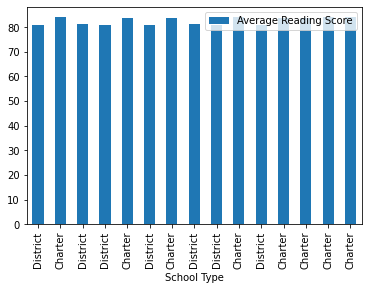

In [265]:
#monthly_mean.reset_index().plot(x='index', y='A')
spend_ranges_df.reset_index().plot.bar(x = "School Type",y = "Average Reading Score")

In [217]:
# 9. Scores by School Size


#Binning 
size_bins= [0,1000,2000,5000]
size_labels= ["Small (<1000)","Medium (1000-2000)","Large (2000-5000)"]

# DataFrame
size_ranges= schools_summary
size_ranges

spend_ranges_df["Spending Ranges(Per Student)"]= pd.cut(spend_ranges_df["Per Student Budget"],size_bins,labels=size_labels)

#Groupping by "Spending Ranges(Per Student)"
#Group by our bins
spend_ranges_df= spend_ranges_df.set_index("Spending Ranges(Per Student)")

#group_spend_range= group_spend_range.loc[group_spend_range["Spending Ranges(Per Student"]<585]
spend_ranges_df=spend_ranges_df.sort_values(["Spending Ranges(Per Student)"])

spend_ranges_df[["Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","Overall Passing Rate"]]
spend_ranges_df


TypeError: '<' not supported between instances of 'int' and 'str'

In [249]:
# Filtering - trying to only get the rows based upon condition
# spend_ranges_df.loc[<row index> ,<column nidex> ] ; Use ":" if you want to display everythign
school_student_df.loc[(school_student_df["gender"]== "M") & (school_student_df["school_name"]== "Thomas High School"),: ]

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
37536,37536,Cody Miller,M,11th,Thomas High School,84,82,14,Charter,1635,1043130
37537,37537,Erik Snyder,M,9th,Thomas High School,80,90,14,Charter,1635,1043130
37539,37539,Noah Erickson,M,9th,Thomas High School,86,76,14,Charter,1635,1043130
37540,37540,Austin Meyer,M,9th,Thomas High School,73,96,14,Charter,1635,1043130
37541,37541,Eric Stevens,M,10th,Thomas High School,80,76,14,Charter,1635,1043130
...,...,...,...,...,...,...,...,...,...,...,...
39154,39154,Bradley Johnson,M,12th,Thomas High School,91,71,14,Charter,1635,1043130
39155,39155,John Brooks,M,10th,Thomas High School,92,98,14,Charter,1635,1043130
39162,39162,Derek Weeks,M,12th,Thomas High School,94,77,14,Charter,1635,1043130
39163,39163,John Reese,M,11th,Thomas High School,90,75,14,Charter,1635,1043130


In [257]:
school_student_df.groupby(["gender"])["reading_score","math_score"].describe()

<ipython-input-257-0d920215a351>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  school_student_df.groupby(["gender"])["reading_score","math_score"].describe()


reading_score                                                      \
               count       mean        std   min   25%   50%   75%   max   
gender                                                                     
F            19735.0  81.996301  10.196729  63.0  74.0  82.0  91.0  99.0   
M            19435.0  81.757551  10.281776  63.0  73.0  82.0  91.0  99.0   

       math_score                                                      
            count       mean        std   min   25%   50%   75%   max  
gender                                                                 
F         19735.0  79.038865  12.320591  55.0  70.0  79.0  90.0  99.0  
M         19435.0  78.931052  12.299251  55.0  69.0  79.0  89.0  99.0

In [251]:
#Aggregation & groupby
#give me a statistic(min,sum,average) of a numrical column (based upon/AS PER) a categorical column

#give me the averge reading score & math score based upon gndr
#school_student_df.groupby([<categorical column>])[<numerical column>].agg([])
school_student_df.groupby(["gender"])["reading_score","math_score"].agg([np.mean])

<ipython-input-251-5cf4e906568e>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  school_student_df.groupby(["gender"])["reading_score","math_score"].agg([np.mean])


,reading_score,math_score
,mean,mean
gender,,
F,81.996301,79.038865
M,81.757551,78.931052


In [256]:
max_score_per_sc= school_student_df.groupby(["school_name"])["reading_score","math_score"].agg([np.max,np.mean])
max_score_per_sc

<ipython-input-256-64e725d41140>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_score_per_sc= school_student_df.groupby(["school_name"])["reading_score","math_score"].agg([np.max,np.mean])


reading_score            math_score           
                               amax       mean       amax       mean
school_name                                                         
Bailey High School               99  81.033963         99  77.048432
Cabrera High School              99  83.975780         99  83.061895
Figueroa High School             99  81.158020         99  76.711767
Ford High School                 99  80.746258         99  77.102592
Griffin High School              99  83.816757         99  83.351499
Hernandez High School            99  80.934412         99  77.289752
Holden High School               99  83.814988         99  83.803279
Huang High School                99  81.182722         99  76.629414
Johnson High School              99  80.966394         99  77.072464
Pena High School                 99  84.044699         99  83.839917
Rodriguez High School            99  80.744686         99  76.842711
Shelton High School              99  83.725724         99  83.359455
Thomas High School               99  83.848930         99  83.418349
Wilson High School               99  83.989488         99  83.274201
Wright High School               99  83.955000         99  83.682222

In [159]:
# 10. Scores by School Type


